In [6]:
import pandas as pd
import os
# 读取文件
city1_path = 'Appendix-3'
city2_path = 'Appendix-4'

# 行业类别列表
industries = [
    'Transportation facilities', 'Science, education, and culture', 'Retail service',
    'Public facilities', 'Motorbike', 'Medical and health', 'Lifestyle service',
    'Interior amenities', 'Government and social organizations', 'Geographical name and address information',
    'Food and beverage service', 'Finance and insurance', 'Car', 'Business-residential', 'Accommodation service'
]

# 加载并合并数据，尝试不同编码格式
def load_data(city_path):
    data = {}
    for industry in industries:
        file_path = os.path.join(city_path, f"{industry} data.csv")
        if os.path.exists(file_path):
            try:
                data_i = pd.read_csv(file_path, encoding='utf-8')
                data_i = data_i.columns.str.replace(r'\r', '', regex=True).str.strip()
                data[industry] = data_i
            except UnicodeDecodeError:
                try:
                    data_i = pd.read_csv(file_path, encoding='ISO-8859-1')
                    data_i = data_i.columns.str.replace(r'\r', '', regex=True).str.strip()
                    data[industry] = data_i
                except UnicodeDecodeError:
                    data_i = pd.read_csv(file_path, encoding='GBK')
                    data_i = data_i.columns.str.replace(r'\r', '', regex=True).str.strip()
                    data[industry] = data_i
    return data

# 加载两个城市的数据
city1_data = load_data(city1_path)
city2_data = load_data(city2_path)

print(city1_data)

{'Transportation facilities': Index(['id', 'type', 'lon_gcj02', 'lat_gcj02', 'typecode', 'citycode',
       'adcode', 'X', 'Y'],
      dtype='object'), 'Science, education, and culture': Index(['id', 'type', 'lon_gcj02', 'lat_gcj02', 'typecode', 'citycode',
       'adcode', 'X', 'Y'],
      dtype='object'), 'Retail service': Index(['id', 'type', 'lon_gcj02', 'lat_gcj02', 'typecode', 'citycode',
       'adcode', 'X', 'Y'],
      dtype='object'), 'Public facilities': Index(['id', 'type', 'lon_gcj02', 'lat_gcj02', 'typecode', 'citycode',
       'adcode', 'X', 'Y'],
      dtype='object'), 'Motorbike': Index(['id', '小类', 'lon_gcj02', 'lat_gcj02', 'typecode', 'citycode', 'adcode',
       'X', 'Y'],
      dtype='object'), 'Medical and health': Index(['id', '小类', 'lon_gcj02', 'lat_gcj02', 'typecode', 'citycode', 'adcode',
       'X', 'Y'],
      dtype='object'), 'Lifestyle service': Index(['id', '小类', 'lon_gcj02', 'lat_gcj02', 'typecode', 'citycode', 'adcode',
       'X', 'Y'],
      dtype='ob

City_1 服务水平统计:
                                     Industry  Service_Count  Density
0                   Transportation facilities          14502    14502
1             Science, education, and culture          15731    15731
2                              Retail service          76444    76444
3                           Public facilities           1915     1915
4                                   Motorbike            691      691
5                          Medical and health          16647    16647
6                           Lifestyle service          38533    38533
7         Government and social organizations          13235    13235
8   Geographical name and address information          57339    57339
9                   Food and beverage service          46049    46049
10                      Finance and insurance           4792     4792
11                                        Car          10135    10135
12                       Business-residential           7523     7523
13   

C:\Windows\Temp\ipykernel_25152\2166025662.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_df.index, y='Service_Count', data=summary_df, palette=['blue'])
C:\Windows\Temp\ipykernel_25152\2166025662.py:64: UserWarning: 
The palette list has fewer values (1) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=summary_df.index, y='Service_Count', data=summary_df, palette=['blue'])


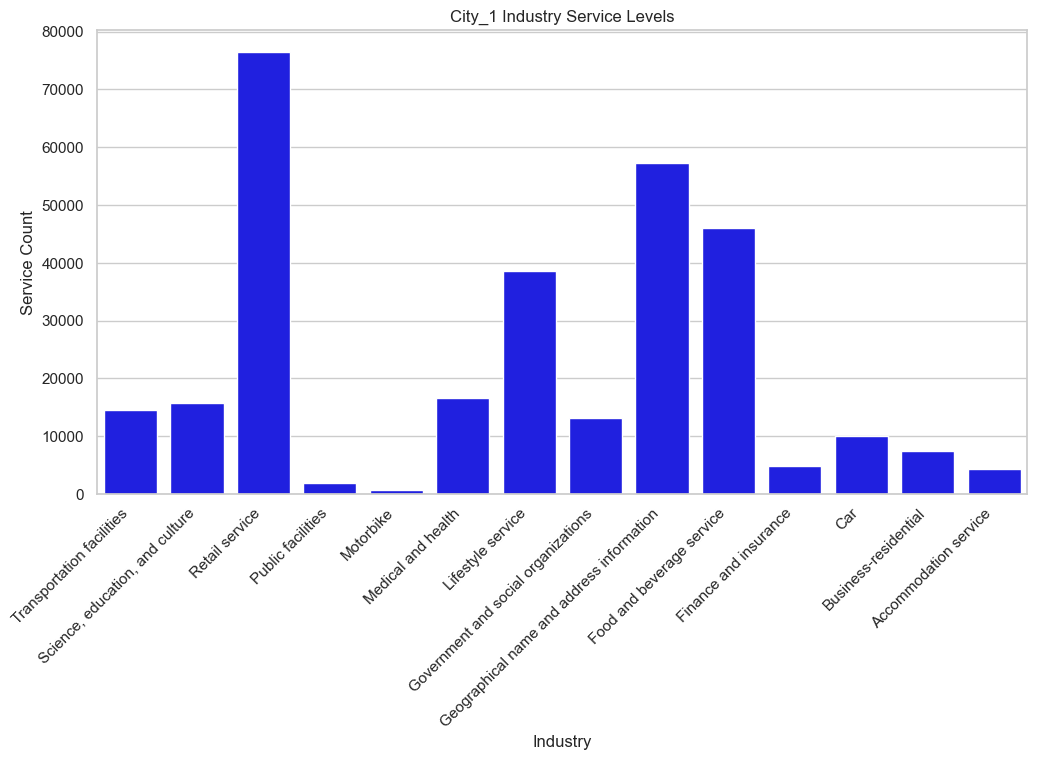

City_2 服务水平统计:
                                     Industry  Service_Count  Density
0                   Transportation facilities           4553     4553
1             Science, education, and culture           5487     5487
2                              Retail service          41380    41380
3                           Public facilities           2153     2153
4                                   Motorbike            159      159
5                          Medical and health           6024     6024
6                           Lifestyle service          19398    19398
7         Government and social organizations           5957     5957
8   Geographical name and address information          22656    22656
9                   Food and beverage service          22339    22339
10                      Finance and insurance           2199     2199
11                                        Car           4284     4284
12                       Business-residential           4056     4056
13   

C:\Windows\Temp\ipykernel_25152\2166025662.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_df.index, y='Service_Count', data=summary_df, palette=['blue'])
C:\Windows\Temp\ipykernel_25152\2166025662.py:64: UserWarning: 
The palette list has fewer values (1) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=summary_df.index, y='Service_Count', data=summary_df, palette=['blue'])


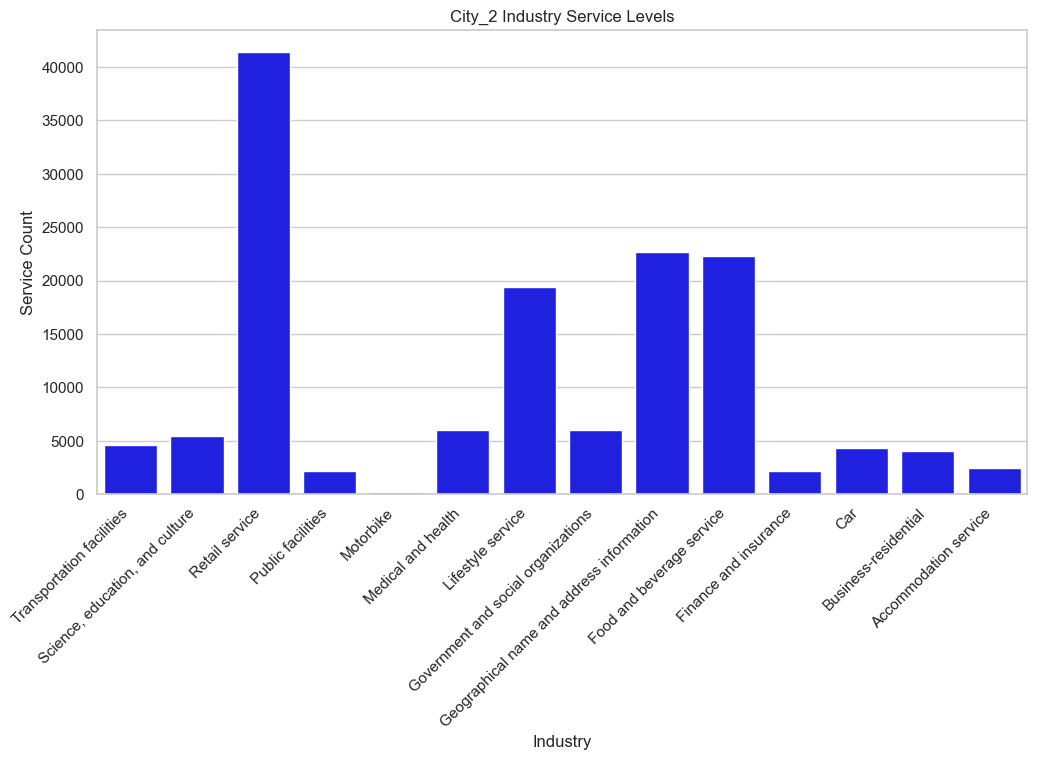

In [26]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据的函数
def load_data(city_path):
    files = [
        'Transportation facilities data.csv', 'Science, education, and culture data.csv', 
        'Retail service data.csv', 'Public facilities data.csv', 'Motorbike data.csv',
        'Medical and health data.csv', 'Lifestyle service data.csv', 
        'Government and social organizations data.csv', 'Geographical name and address information data.csv',
        'Food and beverage service data.csv', 'Finance and insurance data.csv', 'Car data.csv', 
        'Business-residential data.csv', 'Accommodation service data.csv'
    ]
    data = {}
    for file in files:
        file_path = f'{city_path}/{file}'
        try:
            # 尝试不同的编码读取文件
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='ISO-8859-1')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='GBK')
        
        df.columns = df.columns.str.replace(r'\r', '', regex=True).str.strip()
        df['geometry'] = df.apply(lambda row: Point(row['lon_gcj02'], row['lat_gcj02']), axis=1)
        gdf = gpd.GeoDataFrame(df, geometry='geometry')
        data[file] = gdf
    return data

# 定义分析函数
def analyze_service_levels(city_data, city_name):
    summary = []
    for file, gdf in city_data.items():
        # 计算每种设施的数量
        service_count = len(gdf)
        # 计算服务密度（服务点数量/总面积，假设为1单位面积，这里可以进一步改进）
        density = service_count  # 若有实际面积数据，可替换为：service_count / area
        # 行业名称从文件名中提取
        industry = file.replace(' data.csv', '')
        # 添加到汇总信息
        summary.append({'Industry': industry, 'Service_Count': service_count, 'Density': density})
    # 转换为DataFrame
    summary_df = pd.DataFrame(summary)
    # 显示服务水平的汇总结果
    print(f"{city_name} 服务水平统计:")
    print(summary_df)

    # 绘制每个行业的服务数量和密度对比柱状图
    # 设置Seaborn风格
    sns.set(style="whitegrid")

    # 设置行业为索引
    summary_df.set_index('Industry', inplace=True)

    # 创建一个画布
    plt.figure(figsize=(12, 8))

    # 使用Seaborn绘制柱状图，指定颜色为蓝色
    sns.barplot(x=summary_df.index, y='Service_Count', data=summary_df, palette=['blue'])

    # 添加标题和标签
    plt.title(f'{city_name} Industry Service Levels')
    plt.xlabel('Industry')
    plt.ylabel('Service Count')

    # 旋转x轴标签以避免重叠
    plt.xticks(rotation=45, ha='right')

    # 优化横坐标的坐标样式
    plt.tick_params(axis='x', which='major', length=5, direction='out')

    # 调整图形布局，增加底部空间
    plt.subplots_adjust(bottom=0.3)

    os.makedirs('images', exist_ok=True)
    # 保存图片到images文件夹
    plt.savefig(f'images\\{city_name}-1.jpg')
    # 显示图形
    plt.show()



# 加载城市1和城市2的数据
city1_data = load_data('Appendix-3')
city2_data = load_data('Appendix-4')

# 分析城市1和城市2的服务水平
analyze_service_levels(city1_data, "City_1")
analyze_service_levels(city2_data, "City_2")


City 1 和 City 2 服务水平统计:
      City                                   Industry  Service_Count  Density
0   City 1                  Transportation facilities          14502    14502
1   City 1            Science, education, and culture          15731    15731
2   City 1                             Retail service          76444    76444
3   City 1                          Public facilities           1915     1915
4   City 1                                  Motorbike            691      691
5   City 1                         Medical and health          16647    16647
6   City 1                          Lifestyle service          38533    38533
7   City 1        Government and social organizations          13235    13235
8   City 1  Geographical name and address information          57339    57339
9   City 1                  Food and beverage service          46049    46049
10  City 1                      Finance and insurance           4792     4792
11  City 1                              

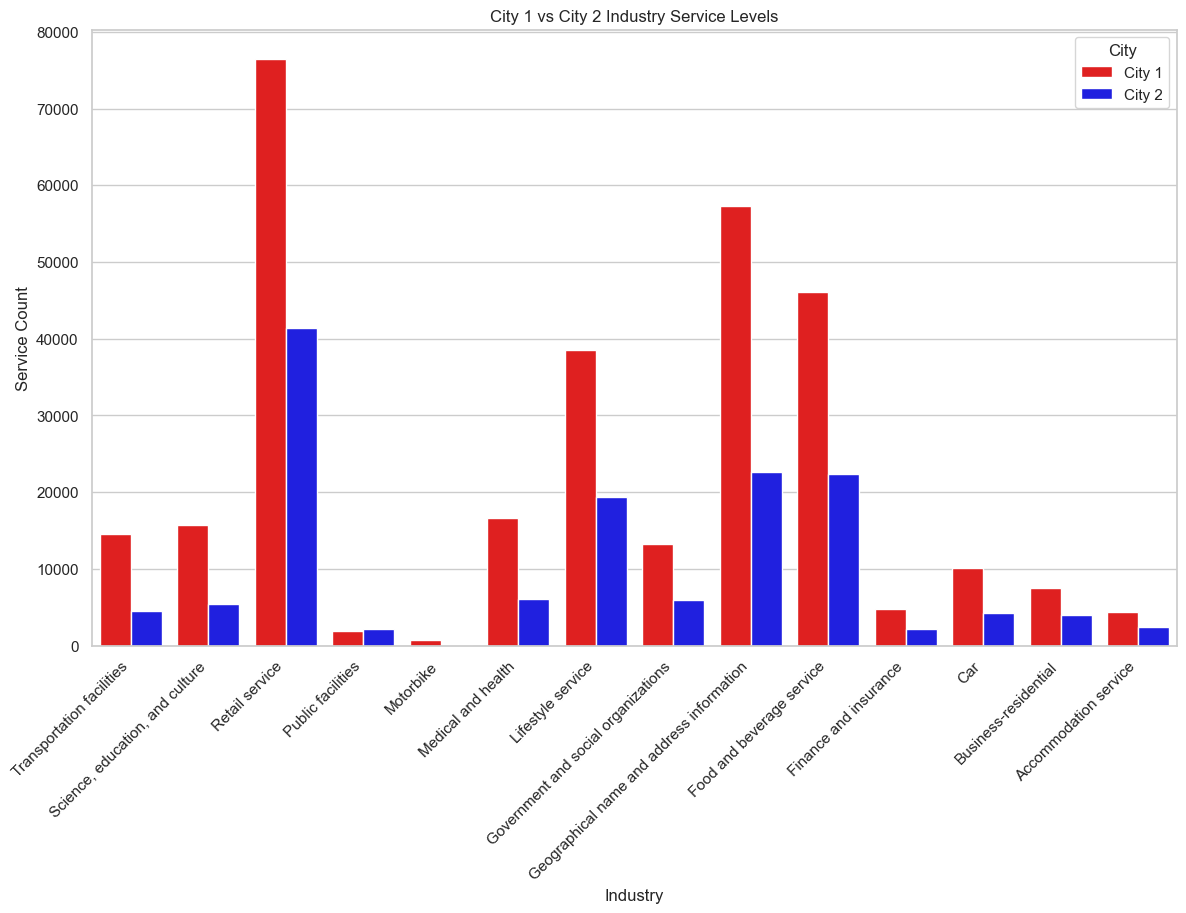

In [30]:
def analyze_service_levels(city1_data, city2_data, city1_name, city2_name):
    summary = []

    for file, gdf in city1_data.items():
        # 计算每种设施的数量
        service_count = len(gdf)

        # 计算服务密度（服务点数量/总面积，假设为1单位面积）
        density = service_count

        # 行业名称从文件名中提取
        industry = file.replace(' data.csv', '')

        # 添加城市1的数据到汇总信息
        summary.append({'City': city1_name, 'Industry': industry, 'Service_Count': service_count, 'Density': density})

    for file, gdf in city2_data.items():
        service_count = len(gdf)
        density = service_count
        industry = file.replace(' data.csv', '')

        # 添加城市2的数据到汇总信息
        summary.append({'City': city2_name, 'Industry': industry, 'Service_Count': service_count, 'Density': density})

    # 转换为DataFrame
    summary_df = pd.DataFrame(summary)

    # 显示服务水平的汇总结果
    print(f"{city1_name} 和 {city2_name} 服务水平统计:")
    print(summary_df)

    # 绘制每个行业的服务数量对比柱状图
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))

    # 使用Seaborn绘制柱状图，以城市分组显示
    # 指定颜色为红色和蓝色
    sns.barplot(x='Industry', y='Service_Count', hue='City', data=summary_df, palette=['red', 'blue'])

    # 添加标题和标签
    plt.title(f'{city1_name} vs {city2_name} Industry Service Levels')
    plt.xlabel('Industry')
    plt.ylabel('Service Count')

    # 旋转x轴标签以避免重叠
    plt.xticks(rotation=45, ha='right')

    os.makedirs('images', exist_ok=True)
    plt.savefig(f'images\\compartion.jpg')
    # 显示图形
    plt.show()

# 加载城市1和城市2的数据
city1_data = load_data('Appendix-3')
city2_data = load_data('Appendix-4')

# 分析并比较城市1和城市2的服务水平
analyze_service_levels(city1_data, city2_data, "City 1", "City 2")
